In [7]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

file_path = "Oder3.csv"
data = pd.read_csv(file_path)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,10/30/2016 9:58,Morning,Weekend
1,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
2,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
3,3,Hot chocolate,10/30/2016 10:07,Morning,Weekend
4,3,Jam,10/30/2016 10:07,Morning,Weekend


In [8]:
transactions = []
for i in range(len(data)):
    transactions.append([item for item in data.iloc[i].dropna()])
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[1, 'Bread', '10/30/2016 9:58', 'Morning', 'Weekend'],
 [2, 'Scandinavian', '10/30/2016 10:05', 'Morning', 'Weekend'],
 [2, 'Scandinavian', '10/30/2016 10:05', 'Morning', 'Weekend'],
 [3, 'Hot chocolate', '10/30/2016 10:07', 'Morning', 'Weekend'],
 [3, 'Jam', '10/30/2016 10:07', 'Morning', 'Weekend'],
 [3, 'Cookies', '10/30/2016 10:07', 'Morning', 'Weekend'],
 [4, 'Muffin', '10/30/2016 10:08', 'Morning', 'Weekend'],
 [5, 'Coffee', '10/30/2016 10:13', 'Morning', 'Weekend'],
 [5, 'Pastry', '10/30/2016 10:13', 'Morning', 'Weekend'],
 [5, 'Bread', '10/30/2016 10:13', 'Morning', 'Weekend'],
 [6, 'Medialuna', '10/30/2016 10:16', 'Morning', 'Weekend'],
 [6, 'Pastry', '10/30/2016 10:16', 'Morning', 'Weekend'],
 [6, 'Muffin', '10/30/2016 10:16', 'Morning', 'Weekend'],
 [7, 'Medialuna', '10/30/2016 10:19', 'Morning', 'Weekend'],
 [7, 'Pastry', '10/30/2016 10:19', 'Morning', 'Weekend'],
 [7, 'Coffee', '10/30/2016 10:19', 'Morning', 'Weekend'],
 [7, 'Tea', '10/30/2016 10:19', 'Morning', 'Weekend'

In [9]:
trans=data.groupby('TransactionNo')['Items'].apply(list).values.tolist()
te = TransactionEncoder()
te_ary = te.fit(trans).transform(trans)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
freq_items=apriori(df,min_support=0.02,use_colnames=True)
freq_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [13]:
rules=association_rules(freq_items,metric='confidence',min_threshold=0.55)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
1,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
2,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


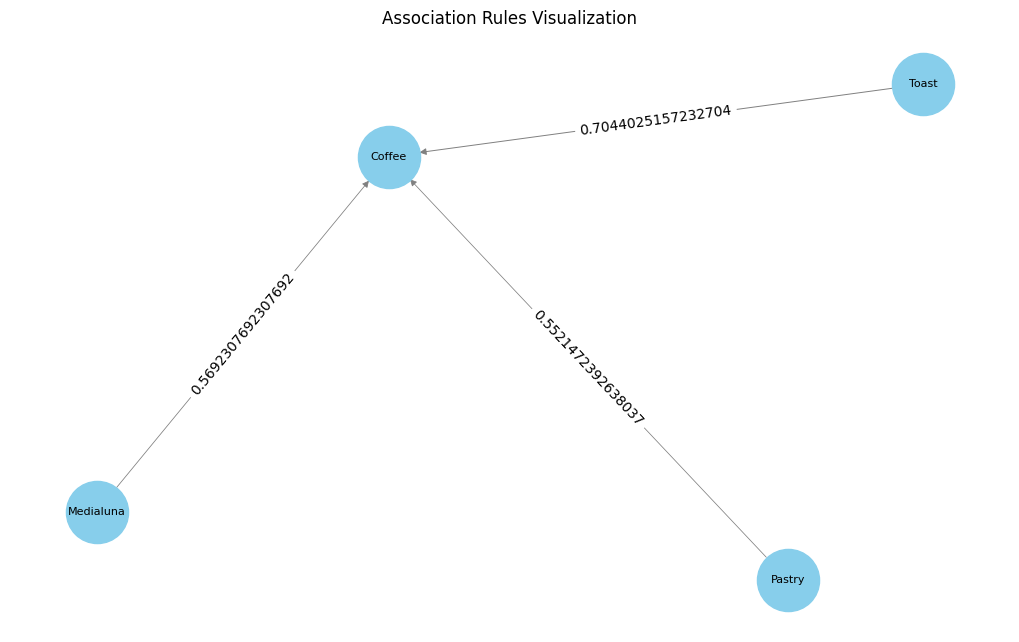

In [14]:
plt.figure(figsize=(10, 6))
G = nx.DiGraph()

for row in rules.itertuples():
    G.add_edge(', '.join(row.antecedents), ', '.join(row.consequents), weight=row.confidence)

pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=2000, node_color='skyblue', edge_color='gray', width=[float(d['weight']) for (u, v, d) in G.edges(data=True)])

# Add edge labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Association Rules Visualization")
plt.show()